In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Data: lenght / width / color
data = [[3, 1.5, 1],
        [2, 1, 0],
        [4, 1.5, 1],
        [3, 1, 0],
        [3.5, 0.5, 1],
        [2, 0.5, 0],
        [5.5, 1, 1],
        [1, 1, 0]]

mystery_flower = [4.5, 1]

In [4]:
# Network
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [5]:
# Funções
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [6]:
# Training loop
learning_rate = 0.2
costs = []

for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
  
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)

    target = point[2]
    cost = np.square(pred - target)

    #costs.append(cost)
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1

    dcost_dz = dcost_pred * dpred_dz

    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db

    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]

            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)

            target = point[2]
            cost_sum += np.square(pred - target)
    
        costs.append(cost_sum / len(data))

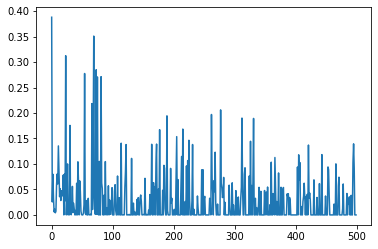

In [7]:
plt.plot(costs)

In [8]:
# Seeing model predictions

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print(f'Pred: {pred}')

[3, 1.5, 1]
Pred: 0.778739938590034
[2, 1, 0]
Pred: 0.0006176373868657092
[4, 1.5, 1]
Pred: 0.9997438085453035
[3, 1, 0]
Pred: 0.4066092931349012
[3.5, 0.5, 1]
Pred: 0.8162517906038915
[2, 0.5, 0]
Pred: 0.00012030863060618016
[5.5, 1, 1]
Pred: 0.9999999643485854
[1, 1, 0]
Pred: 5.574000336923345e-07


In [9]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.9999604729613681